In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd
import scipy.stats as stat

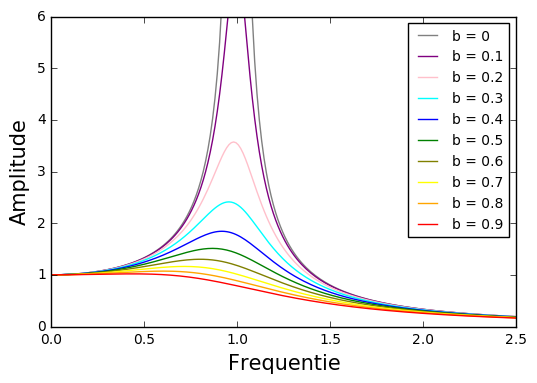

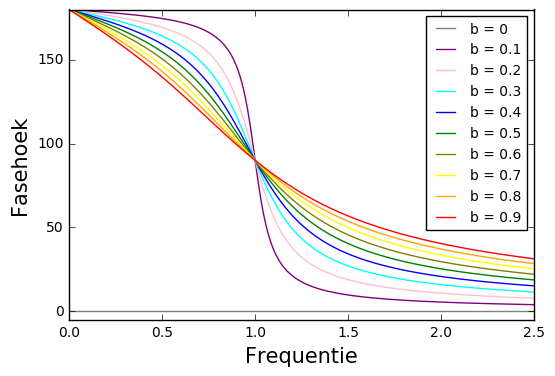

In [4]:
def modelA(X,w,b):
    return X/np.sqrt(2*b**2*w**2+(1-w**2)**2)
def modelB(w,b):
    return -np.arctan(np.sqrt(2)*w*b/(1-w**2))*180/np.pi

w = np.linspace(0,2.5,200)
w1 = np.linspace(0,0.999999999, 100)
w2 = np.linspace(1.0000001,2.5, 150)
X = 1

b=0
fig, ax = plt.subplots(1, 1)
ax.plot(w,modelA(X,w,0  ),label = "b = 0  ", color = "grey")
ax.plot(w,modelA(X,w,0.1),label = "b = 0.1", color = "purple")
ax.plot(w,modelA(X,w,0.2),label = "b = 0.2", color = "pink")
ax.plot(w,modelA(X,w,0.3),label = "b = 0.3", color = "cyan")
ax.plot(w,modelA(X,w,0.4),label = "b = 0.4", color = "blue")
ax.plot(w,modelA(X,w,0.5),label = "b = 0.5", color = "green")
ax.plot(w,modelA(X,w,0.6),label = "b = 0.6", color = "olive")
ax.plot(w,modelA(X,w,0.7),label = "b = 0.7", color = "yellow")
ax.plot(w,modelA(X,w,0.8),label = "b = 0.8", color = "orange")
ax.plot(w,modelA(X,w,0.9),label = "b = 0.9", color = "red")
ax.set_xlabel("Frequentie", size=15)
ax.set_ylabel("Amplitude", size=15)
ax.set_ylim([0,6])
ax.legend(fontsize = 10)
#fig.savefig('Afbeelding1.jpg', dpi=400, bbox_inches='tight') 
plt.show()

fig, ax = plt.subplots(1, 1)
ax.plot(w,modelB(w,0    )    ,color = 'grey',label = "b = 0")
ax.plot(w1,modelB(w1,0.1)+180,color = 'purple',label = "b = 0.1")
ax.plot(w2,modelB(w2,0.1)    ,color = 'purple')
ax.plot(w1,modelB(w1,0.2)+180,color = 'pink',label = "b = 0.2")
ax.plot(w2,modelB(w2,0.2)    ,color = 'pink')
ax.plot(w1,modelB(w1,0.3)+180,color = 'cyan',label = "b = 0.3")
ax.plot(w2,modelB(w2,0.3)    ,color = 'cyan')
ax.plot(w1,modelB(w1,0.4)+180,color = 'blue',label = "b = 0.4")
ax.plot(w2,modelB(w2,0.4)    ,color = 'blue')
ax.plot(w1,modelB(w1,0.5)+180,color = 'green',label = "b = 0.5")
ax.plot(w2,modelB(w2,0.5)    ,color = 'green')
ax.plot(w1,modelB(w1,0.6)+180,color = 'olive',label = "b = 0.6")
ax.plot(w2,modelB(w2,0.6)    ,color = 'olive')
ax.plot(w1,modelB(w1,0.7)+180,color = 'yellow',label = "b = 0.7")
ax.plot(w2,modelB(w2,0.7)    ,color = 'yellow')
ax.plot(w1,modelB(w1,0.8)+180,color = 'orange',label = "b = 0.8")
ax.plot(w2,modelB(w2,0.8)    ,color = 'orange')
ax.plot(w1,modelB(w1,0.9)+180,color = 'red',label = "b = 0.9")
ax.plot(w2,modelB(w2,0.9)    ,color = 'red')
ax.set_xlabel("Frequentie", size=15)
ax.set_ylabel("Fasehoek", size=15)
ax.set_ylim(-5,180,20)
ax.legend(fontsize = 10)
#fig.savefig('Afbeelding2.jpg', dpi=400, bbox_inches='tight') 
plt.show()

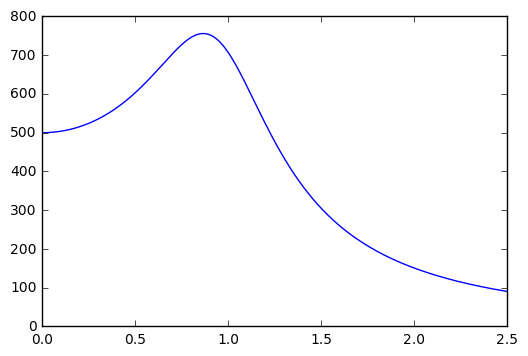

In [292]:
w = np.linspace(0,2.5,200)
def modelA(X,w,b):
    return X/np.sqrt(2*b**2*w**2+(1-w**2)**2)
X = 500
fig = plt.figure()
plt.plot(w,modelA(X,w,0.5))
plt.show()

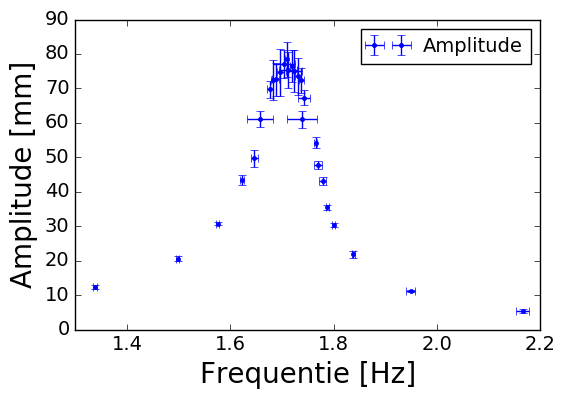

498.878902029 0.563180395399 10.6879979177


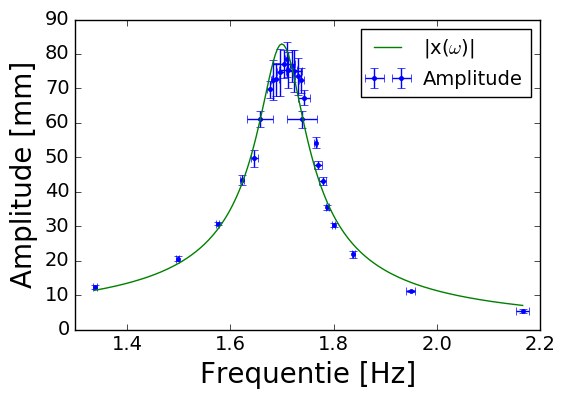

0.0%


In [39]:
Data1  = pd.read_csv('dataklein.txt', sep=" ", header=None)
Data1A = Data1[0:-1]

f  = np.array(Data1A[0])
Df = np.array(Data1A[1])
a  = np.array(Data1A[2])
Da = np.array(Data1A[3])


FigVi = plt.figure()
plt.errorbar(f, a, Da, Df, fmt = '.',label = "Amplitude")
plt.ylabel("Amplitude [mm]", size=20)
plt.xlabel('Frequentie [Hz]', size=20)
plt.legend(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
#FigVi.savefig('Afbeelding3.jpg', dpi=1200, bbox_inches='tight') 
plt.show()


def model(freq,kracht,rem,veer):
    return kracht/(np.sqrt( (veer**2-(2*np.pi*freq)**2)**2 + (2*np.pi*freq*rem)**2 ))

x0 = [20,0.12,10]

def chi2(x,y,param,s):
    diff = y - model(x, param[0], param[1], param[2])
    return np.sum((diff/s)**2)
    
chi2ftie = lambda param: chi2(f, a, param, Da)

result = opt.minimize(chi2ftie,x0)
F,n,w = result.x
print(F,n,w)

f_smooth = np.linspace(f.min(),f.max(),200)

FigVi = plt.figure()
plt.errorbar(f, a, Da, Df, fmt = '.',label = "Amplitude")
plt.ylabel("Amplitude [mm]", size=20)
plt.xlabel('Frequentie [Hz]', size=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.plot(f_smooth, model(f_smooth, F,n,w), label = r"|x($\omega$)|")
plt.legend(fontsize=14)
#FigVi.savefig('Afbeelding4.jpg', dpi=1200, bbox_inches='tight') 
plt.show()

v = len(f) - len([F,n,w])
pwaarde = 1 - stat.chi2.cdf(chi2ftie([F,n,w]), v)
print(str(pwaarde*100)+"%")

In [329]:
rF = lambda Fi: chi2(f, a, [Fi,n,w], Da) - chi2(f, a, [F,n,w], Da) - 1
F1 = opt.fsolve(rF,497)[0]
F2 = opt.fsolve(rF,500)[0]
sF1 = F1 - F
sF2 = F2 - F
print("Fout op F",sF1,sF2)
print(F1,F,F2)

rn = lambda ni: chi2(f, a, [F,ni,w], Da) - chi2(f, a, [F,n,w], Da) - 1
n1 = opt.fsolve(rn,0.55)[0]
n2 = opt.fsolve(rn,0.57)[0]
sn1 = n1 - n
sn2 = n2 - n
print("Fout op n",sn1,sn2)
print(n1,n,n2)

rw = lambda wi: chi2(f, a, [F,n,wi], Da) - chi2(f, a, [F,n,w], Da) - 1
w1 = opt.fsolve(rw,10)[0]
w2 = opt.fsolve(rw,11)[0]
sw1 = w1 - w
sw2 = w2 - w
print("Fout op w",sw1,sw2)
print(w1,w,w2)

Fout op F -3.33510159123 3.33510342536
495.543800438 498.878902029 502.214005455
Fout op n -0.00902177815674 0.00918716936783
0.554158617242 0.563180395399 0.572367564767
Fout op w -0.00516244039319 0.00513962750641
10.6828354774 10.6879979177 10.6931375453


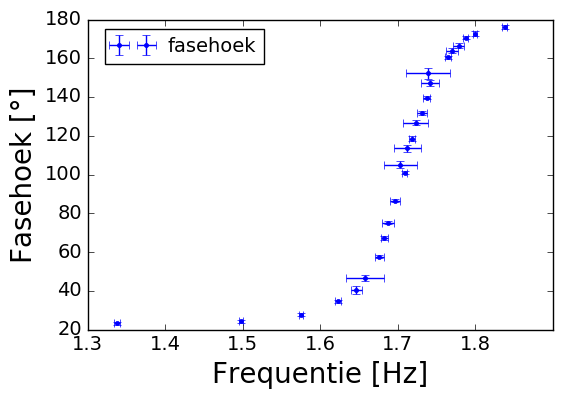

0.447253065023 10.6620522022


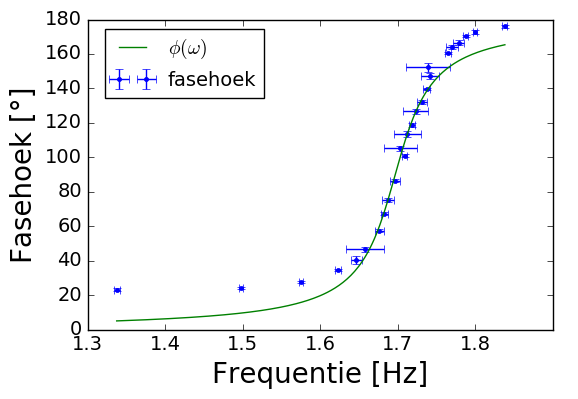

0.0


In [11]:
Data1 = pd.read_csv('dataklein.txt', sep=" ", header=None)
Data1 = Data1[2:-1]

f = np.array(Data1[0])
Df = np.array(Data1[1])
p = np.array(Data1[4])
Dp = np.array(Data1[5])

FigVi = plt.figure()
plt.errorbar(f, p, Dp, Df, fmt = '.', label = "fasehoek")
plt.ylabel("Fasehoek [°]", size=20)
plt.xlabel('Frequentie [Hz]', size=20)
plt.legend(bbox_to_anchor=(0.4,1),fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
FigVi.savefig('Afbeelding5.jpg', dpi=1200, bbox_inches='tight') 
plt.show()

def model2(freq,rem,veer):
    return np.arctan2(2*np.pi*freq*rem, veer**2-(2*np.pi*freq)**2)*180/np.pi

x0 = [0.5, 10]
#s = DV/np.sqrt(12)

def chi2(x,y,param,s):
    diff = y - model2(x, param[0], param[1])
    return np.sum((diff/s)**2)
    

chi2ftie = lambda param: chi2(f, p, param, Dp)

result = opt.minimize(chi2ftie,x0)
n,w = result.x
print(n,w)

f_smooth = np.linspace(f.min(),f.max(),200)
FigVi = plt.figure()
plt.errorbar(f, p, Dp, Df, fmt = '.',label = "fasehoek")
plt.ylabel("Fasehoek [°]", size=20)
plt.xlabel('Frequentie [Hz]', size=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.plot(f_smooth, model2(f_smooth, n,w), label = r"$\phi(\omega)$")
plt.legend(bbox_to_anchor=(0.4,1),fontsize=14)
FigVi.savefig('Afbeelding6.jpg', dpi=1200, bbox_inches='tight')
plt.show()

v = len(f) - len([n,w])
pwaarde = 1 - stat.chi2.cdf(chi2ftie([n,w]), v)
print(str(pwaarde*100))

In [331]:
rn = lambda ni: chi2(f, p, [ni,w], Dp) - chi2(f, p, [n,w], Dp) - 1
n1 = opt.fsolve(rn,0.4)[0]
n2 = opt.fsolve(rn,0.5)[0]
sn1 = n1 - n
sn2 = n2 - n
print("Fout op n",sn1,sn2)
print(n1,n,n2)

rw = lambda wi: chi2(f, p, [n,wi], Dp) - chi2(f, p, [n,w], Dp) - 1
w1 = opt.fsolve(rw,10)[0]
w2 = opt.fsolve(rw,11)[0]
sw1 = w1 - w
sw2 = w2 - w
print("Fout op w",sw1,sw2)
print(w1,w,w2)

Fout op n -0.00425816982431 0.00429411071227
0.442994895199 0.447253065023 0.451547175735
Fout op w -0.00138504058945 0.00138437564012
10.6606671617 10.6620522022 10.6634365779


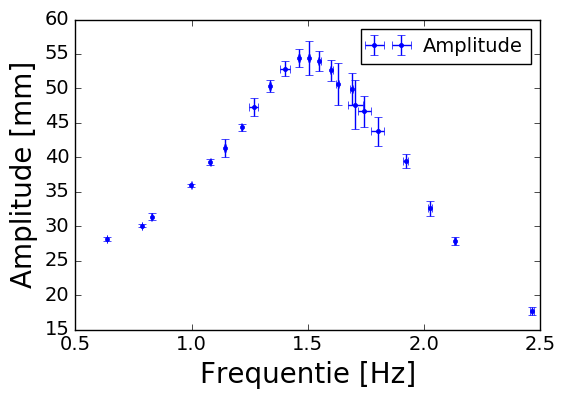

2609.81442004 4.67180721859 10.2991380799


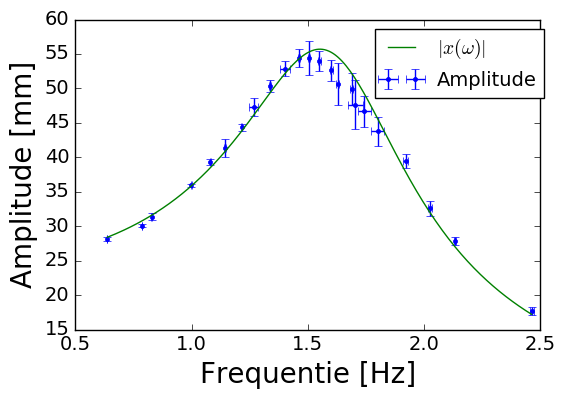

5.77073141736%


In [12]:
Data1 = pd.read_csv('datagroot.txt', sep=" ", header=None)
Data1A = Data1.drop(Data1.index[26])
Data1A = Data1A.drop(Data1A.index[6])
Data1A = Data1A.drop(Data1A.index[5])
Data1A = Data1A.drop(Data1A.index[2])
Data1A = Data1A.drop(Data1A.index[0])

f = np.array(Data1A[0])
Df = np.array(Data1A[1])
a = np.array(Data1A[2])
Da = np.array(Data1A[3])
FigVi = plt.figure()
plt.errorbar(f, a, Da, Df, fmt = '.', label = "Amplitude")
plt.ylabel("Amplitude [mm]", size=20)
plt.xlabel('Frequentie [Hz]', size=20)
plt.legend(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
FigVi.savefig('Afbeelding7.jpg', dpi=1200, bbox_inches='tight') 
plt.show()

def model(freq,kracht,rem,veer):
    return kracht/(np.sqrt( (veer**2-(2*np.pi*freq)**2)**2 + (2*np.pi*freq*rem)**2 ))

x0 = [65,4,2]

def chi2(x,y,param,s):
    diff = y - model(x, param[0], param[1], param[2])
    return np.sum((diff/s)**2)
    

chi2ftie = lambda param: chi2(f, a, param, Da)

result = opt.minimize(chi2ftie,x0)
F,n,w = result.x
print(F,n,w)

f_smooth = np.linspace(f.min(),f.max(),200)

FigVi = plt.figure()
plt.errorbar(f, a, Da, Df, fmt = '.', label = "Amplitude")
plt.ylabel("Amplitude [mm]", size=20)
plt.xlabel('Frequentie [Hz]', size=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.plot(f_smooth, model(f_smooth, F,n,w), label = r"$|x(\omega)|$")
plt.legend(bbox_to_anchor=(1.03,1),fontsize=14)
FigVi.savefig('Afbeelding8.jpg', dpi=1200, bbox_inches='tight') 
plt.show()

v = len(f) - len([F,n,w])
pwaarde = 1 - stat.chi2.cdf(chi2ftie([F,n,w]), v)
print(str(pwaarde*100)+"%")

In [337]:
rF = lambda Fi: chi2(f, a, [Fi,n,w], Da) - chi2(f, a, [F,n,w], Da) - 1
F1 = opt.fsolve(rF,2606)[0]
F2 = opt.fsolve(rF,2612)[0]
sF1 = F1 - F
sF2 = F2 - F
print("Fout op F",sF1,sF2)
print(F1,F,F2)

rn = lambda ni: chi2(f, a, [F,ni,w], Da) - chi2(f, a, [F,n,w], Da) - 1
n1 = opt.fsolve(rn,4)[0]
n2 = opt.fsolve(rn,5)[0]
sn1 = n1 - n
sn2 = n2 - n
print("Fout op n",sn1,sn2)
print(n1,n,n2)

rw = lambda wi: chi2(f, a, [F,n,wi], Da) - chi2(f, a, [F,n,w], Da) - 1
w1 = opt.fsolve(rw,10)[0]
w2 = opt.fsolve(rw,11)[0]
sw1 = w1 - w
sw2 = w2 - w
print("Fout op w",sw1,sw2)
print(w1,w,w2)

Fout op F -9.29054193045 9.29053426297
2600.52387811 2609.81442004 2619.10495431
Fout op n -0.0426995727841 0.0431336382495
4.62910764581 4.67180721859 4.71494085684
Fout op w -0.0149743440151 0.0150385095091
10.2841637359 10.2991380799 10.3141765894


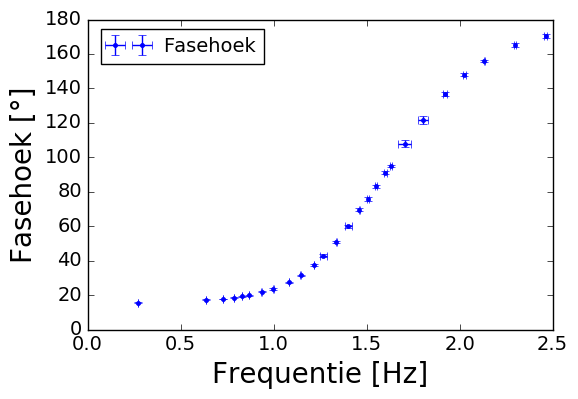

-4.53174710735 9.94669201765


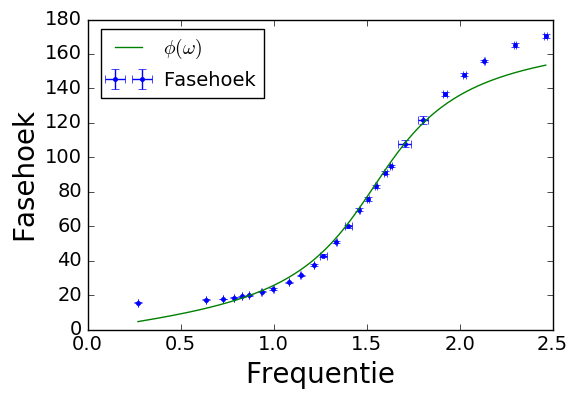

0.0


In [13]:
Data1 = pd.read_csv('datagroot.txt', sep=" ", header=None)

Data1 = Data1.drop(Data1.index[21])
Data1 = Data1.drop(Data1.index[19])


f = np.array(Data1[0])
Df = np.array(Data1[1])
p = np.array(Data1[4])
Dp = np.array(Data1[5])

FigVi = plt.figure()
plt.errorbar(f, p, Dp, Df, fmt = '.', label = "Fasehoek")
plt.ylabel("Fasehoek [°]", size=20)
plt.xlabel('Frequentie [Hz]', size=20)
plt.legend(bbox_to_anchor=(0.4,1), fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
FigVi.savefig('Afbeelding9.jpg', dpi=1200, bbox_inches='tight') 
plt.show()

def model2(freq,rem,veer):
    return -np.arctan2(2*np.pi*freq*rem, veer**2-(2*np.pi*freq)**2)*180/np.pi

x0 = [50, 10]

def chi2(x,y,param,s):
    diff = y - model2(x, param[0], param[1])
    return np.sum((diff/s)**2)
    

chi2ftie = lambda param: chi2(f, p, param, Dp)

result = opt.minimize(chi2ftie,x0)
n,w = result.x
print(n,w)

f_smooth = np.linspace(f.min(),f.max(),200)
FigVi = plt.figure()
plt.errorbar(f, p, Dp, Df, fmt = '.', label = "Fasehoek")
plt.ylabel("Fasehoek", size=20)
plt.xlabel('Frequentie', size=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.plot(f_smooth, model2(f_smooth, n,w), label = r"$\phi(\omega)$")
plt.legend(bbox_to_anchor=(0.4,1), fontsize=14)
FigVi.savefig('Afbeelding10.jpg', dpi=1200, bbox_inches='tight') 
plt.show()

v = len(f) - len([n,w])
pwaarde = 1 - stat.chi2.cdf(chi2ftie([n,w]), v)
print(str(pwaarde*100))

In [339]:
rn = lambda ni: chi2(f, p, [ni,w], Dp) - chi2(f, p, [n,w], Dp) - 1
n1 = opt.fsolve(rn,-5)[0]
n2 = opt.fsolve(rn,-4)[0]
sn1 = n1 - n
sn2 = n2 - n
print("Fout op n",sn1,sn2)
print(n1,n,n2)

rw = lambda wi: chi2(f, p, [n,wi], Dp) - chi2(f, p, [n,w], Dp) - 1
w1 = opt.fsolve(rw,9.5)[0]
w2 = opt.fsolve(rw,10)[0]
sw1 = w1 - w
sw2 = w2 - w
print("Fout op w",sw1,sw2)
print(w1,w,w2)

Fout op n -0.0211310270033 0.0210796709673
-4.55287807039 -4.53174704339 -4.51066737242
Fout op w -0.00864534372253 0.00865818755228
9.93804665274 9.94669199647 9.95535018402
